In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import kagglehub
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, classification_report, roc_auc_score, roc_curve

In [5]:
data = pd.read_csv('loan_train.csv')
print(data.head())

  Gender Married Dependents     Education Self_Employed  Applicant_Income  \
0   Male      No          0      Graduate            No            584900   
1   Male     Yes          1      Graduate            No            458300   
2   Male     Yes          0      Graduate           Yes            300000   
3   Male     Yes          0  Not Graduate            No            258300   
4   Male      No          0      Graduate            No            600000   

   Coapplicant_Income  Loan_Amount   Term  Credit_History   Area Status  
0                 0.0     15000000  360.0             1.0  Urban      Y  
1            150800.0     12800000  360.0             1.0  Rural      N  
2                 0.0      6600000  360.0             1.0  Urban      Y  
3            235800.0     12000000  360.0             1.0  Urban      Y  
4                 0.0     14100000  360.0             1.0  Urban      Y  


In [6]:
print(data.head())
print(data.isnull().sum())

  Gender Married Dependents     Education Self_Employed  Applicant_Income  \
0   Male      No          0      Graduate            No            584900   
1   Male     Yes          1      Graduate            No            458300   
2   Male     Yes          0      Graduate           Yes            300000   
3   Male     Yes          0  Not Graduate            No            258300   
4   Male      No          0      Graduate            No            600000   

   Coapplicant_Income  Loan_Amount   Term  Credit_History   Area Status  
0                 0.0     15000000  360.0             1.0  Urban      Y  
1            150800.0     12800000  360.0             1.0  Rural      N  
2                 0.0      6600000  360.0             1.0  Urban      Y  
3            235800.0     12000000  360.0             1.0  Urban      Y  
4                 0.0     14100000  360.0             1.0  Urban      Y  
Gender                13
Married                3
Dependents            15
Education         

       Applicant_Income  Coapplicant_Income   Loan_Amount       Term  \
count      6.140000e+02        6.140000e+02  6.140000e+02  600.00000   
mean       5.403459e+05        1.621246e+05  1.414104e+07  342.00000   
std        6.109042e+05        2.926248e+05  8.815682e+06   65.12041   
min        1.500000e+04        0.000000e+00  0.000000e+00   12.00000   
25%        2.877500e+05        0.000000e+00  9.800000e+06  360.00000   
50%        3.812500e+05        1.188500e+05  1.250000e+07  360.00000   
75%        5.795000e+05        2.297250e+05  1.647500e+07  360.00000   
max        8.100000e+06        4.166700e+06  7.000000e+07  480.00000   

       Credit_History  
count      564.000000  
mean         0.842199  
std          0.364878  
min          0.000000  
25%          1.000000  
50%          1.000000  
75%          1.000000  
max          1.000000  


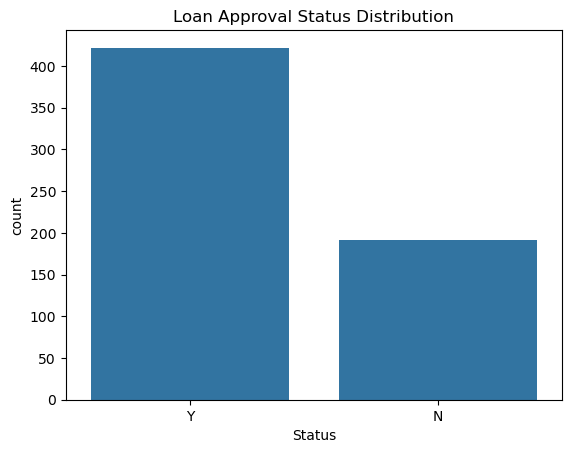

In [8]:
print(data.describe())
sns.countplot(x='Status', data=data)
plt.title('Loan Approval Status Distribution')
plt.show()

In [9]:
# Fill missing values (if any)
data.fillna(data.median(), inplace=True)  # For numerical features
data.fillna(data.mode().iloc[0], inplace=True)  # For categorical features

TypeError: Cannot convert [['Male' 'Male' 'Male' ... 'Male' 'Male' 'Female']
 ['No' 'Yes' 'Yes' ... 'Yes' 'Yes' 'No']
 ['0' '1' '0' ... '1' '2' '0']
 ...
 ['No' 'No' 'Yes' ... 'No' 'No' 'Yes']
 ['Urban' 'Rural' 'Urban' ... 'Urban' 'Urban' 'Semiurban']
 ['Y' 'N' 'Y' ... 'Y' 'Y' 'N']] to numeric

In [10]:
print(data.dtypes)

Gender                 object
Married                object
Dependents             object
Education              object
Self_Employed          object
Applicant_Income        int64
Coapplicant_Income    float64
Loan_Amount             int64
Term                  float64
Credit_History        float64
Area                   object
Status                 object
dtype: object
